In [1]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [2]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse_logf (control parameters: ['p_A', 'logf', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [3]:
"""Base settings"""

# r-string will not convert \n to new line
directory = r'2_plus_1_gradient_search/0.005_atm'
file_base_name = 'output_'

In [4]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))

        # Cast object-dtype columns with all-bool values to bool dtype
        for col in current_data.columns:
            if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                current_data[col] = current_data[col].astype(bool)

        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (2000 rows)
	output_10.csv            ( 200 rows)
	output_11.csv            ( 215 rows)
	output_12.csv            ( 290 rows)
	output_13.csv            ( 250 rows)
	output_14.csv            ( 300 rows)
	output_15.csv            (  80 rows)
	output_16.csv            ( 300 rows)
	output_17.csv            ( 250 rows)
	output_18.csv            ( 219 rows)
	output_19.csv            ( 115 rows)
	output_2.csv             ( 100 rows)
	output_20.csv            ( 179 rows)
	output_21.csv            ( 179 rows)
	output_22.csv            ( 159 rows)
	output_23.csv            ( 109 rows)
	output_24.csv            (  79 rows)
	output_25.csv            (  29 rows)
	output_26.csv            (   9 rows)
	output_6.csv             ( 265 rows)
	output_7.csv             ( 170 rows)
	output_8.csv             ( 255 rows)
	output_9.csv             ( 300 rows)
_______________________________________
total number of files: 23
total:      6052    rows   ( 100.00 %)
xx0:    

In [5]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas (or use all_data['success'] == True)
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 6019 rows ( 99.45 %)


In [6]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,logf,n
98,1452,0.000337,1.0,506.625,0.35,303.15,4245.125716,0.000815,14.749639,80679,1.557780e-11,4.568369e+01,-299857.133611,4.063938,1.0
96,1452,0.000337,1.0,506.625,0.35,303.15,4245.125716,0.000815,14.567360,80965,1.557808e-11,4.568370e+01,-299857.133611,4.063936,1.0
95,1452,0.000337,1.0,506.625,0.35,303.15,4245.125716,0.000815,14.203194,80350,1.557810e-11,4.568371e+01,-299857.133611,4.063936,1.0
94,1452,0.000337,1.0,506.625,0.35,303.15,4245.125716,0.000815,13.861575,80350,1.557810e-11,4.568371e+01,-299857.133611,4.063936,1.0
97,1452,0.000337,1.0,506.625,0.35,303.15,4245.125716,0.000815,13.545422,81010,1.557805e-11,4.568373e+01,-299856.880299,4.063936,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1672,0.000481,1.0,506.625,0.35,303.15,4245.125716,0.000815,10.894329,64503,5.149723e-56,2.941343e+44,-159573.315493,4.277724,1.0
1202,1205,0.000127,1.0,506.625,0.35,303.15,4245.125716,0.000815,12.366557,62333,1.024529e-57,6.464858e+44,-270765.009608,4.949503,1.0
1834,1835,0.000395,1.0,506.625,0.35,303.15,4245.125716,0.000815,12.430915,74280,1.431062e-56,2.326241e+45,-257669.129988,4.373156,1.0
1689,1642,0.000399,1.0,506.625,0.35,303.15,4245.125716,0.000815,81.707595,76538,3.474358e-60,3.102320e+49,-219477.948985,4.210268,1.0


In [7]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args].describe()

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,logf,n
count,6019.000000,6019.000000,6019.0,6019.000,6.019000e+03,6.019000e+03,6.019000e+03,6.019000e+03,6019.000000,6019.000000,6.019000e+03,6.019000e+03,6019.000000,6019.000000,6019.0
mean,993.189733,0.000217,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,13.704224,69454.314006,3.163830e-12,1.956692e+60,-220530.124953,4.443864,1.0
std,570.740382,0.000094,0.0,0.000,1.110315e-16,5.684814e-14,9.095703e-13,1.084292e-19,8.380936,21148.884369,3.318513e-12,1.518045e+62,62988.492017,0.516576,0.0
min,0.000000,0.000006,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.201563,7190.000000,-5.078103e-26,4.568369e+01,-301377.387350,4.000020,1.0
25%,490.000000,0.000163,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,13.207806,70106.500000,1.809982e-54,6.025103e+01,-272861.008349,4.116995,1.0
50%,1013.000000,0.000196,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,14.102158,78335.000000,2.891864e-12,6.793715e+01,-241781.203700,4.215557,1.0
75%,1494.000000,0.000256,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,14.811904,79708.000000,4.338736e-12,1.000000e+30,-189085.567784,4.502064,1.0
max,1999.000000,0.000495,1.0,506.625,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,122.803106,153575.000000,1.641290e-11,1.177733e+64,-53218.299077,5.978723,1.0


In [8]:
directory

'2_plus_1_gradient_search/0.005_atm'

In [177]:
importlib.reload(de)

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse_logf (control parameters: ['p_A', 'logf', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


<module 'Bubble_dynamics_simulation.full_bubble_model' from 'd:\\parameter_studies\\Bubble_dynamics_simulation\\full_bubble_model.py'>

succecfully solved with LSODA solver
Low pressure warning: The pressure during the expansion is lower, than the saturated water pressure


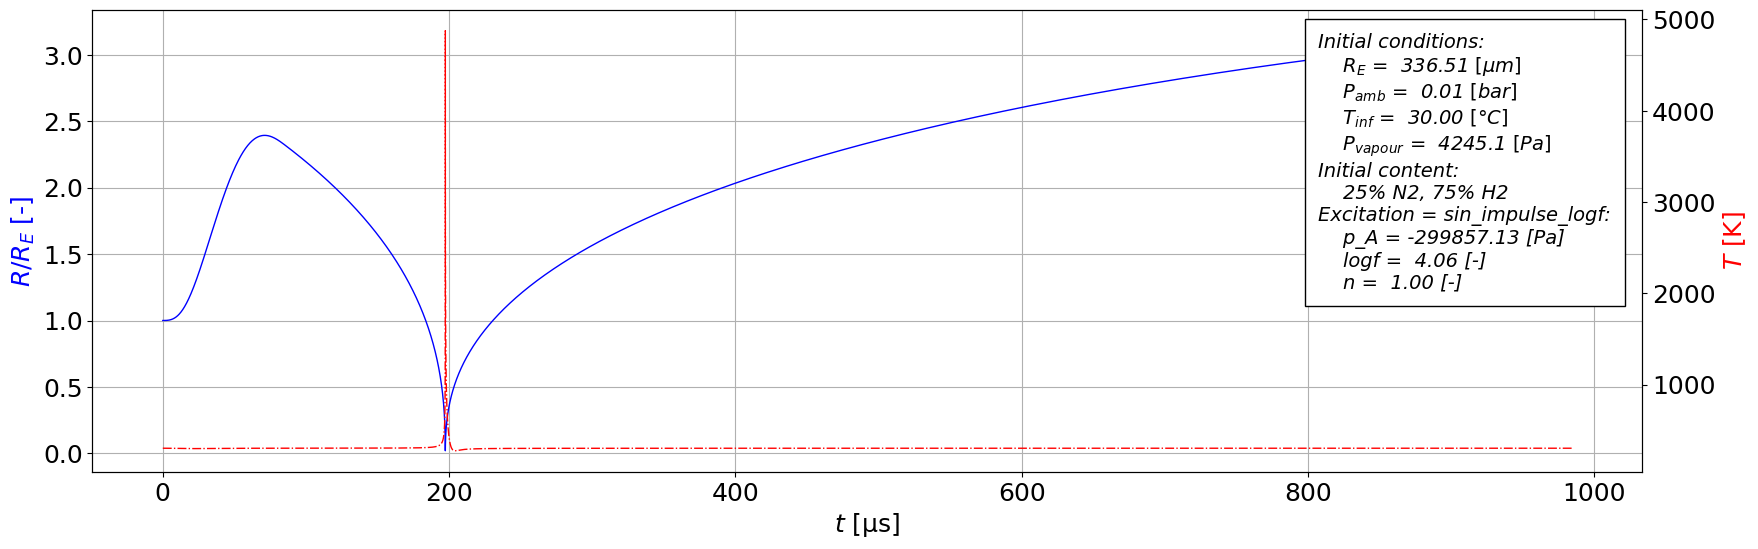

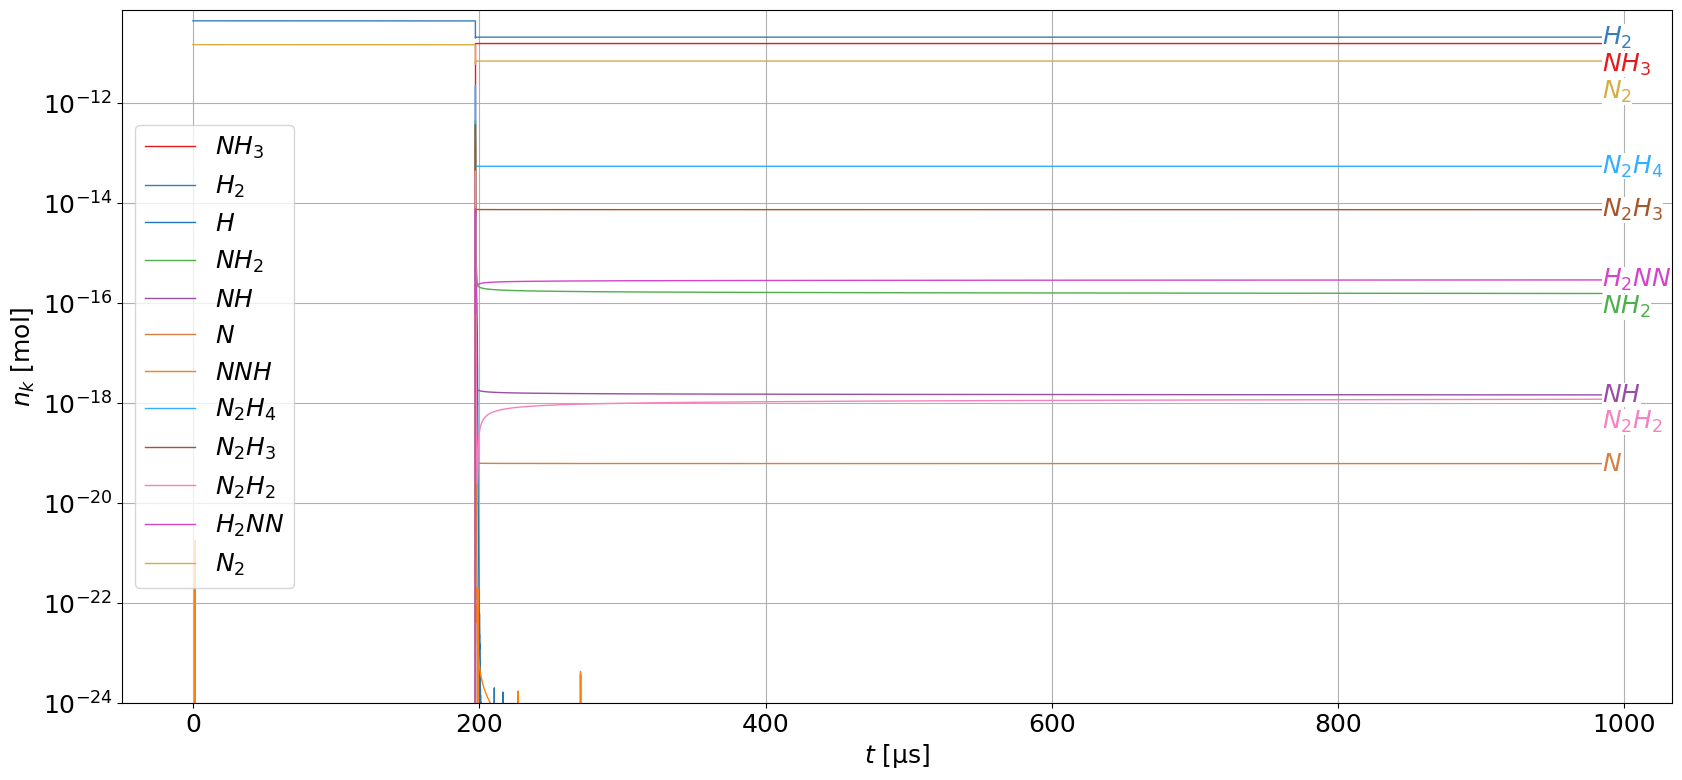

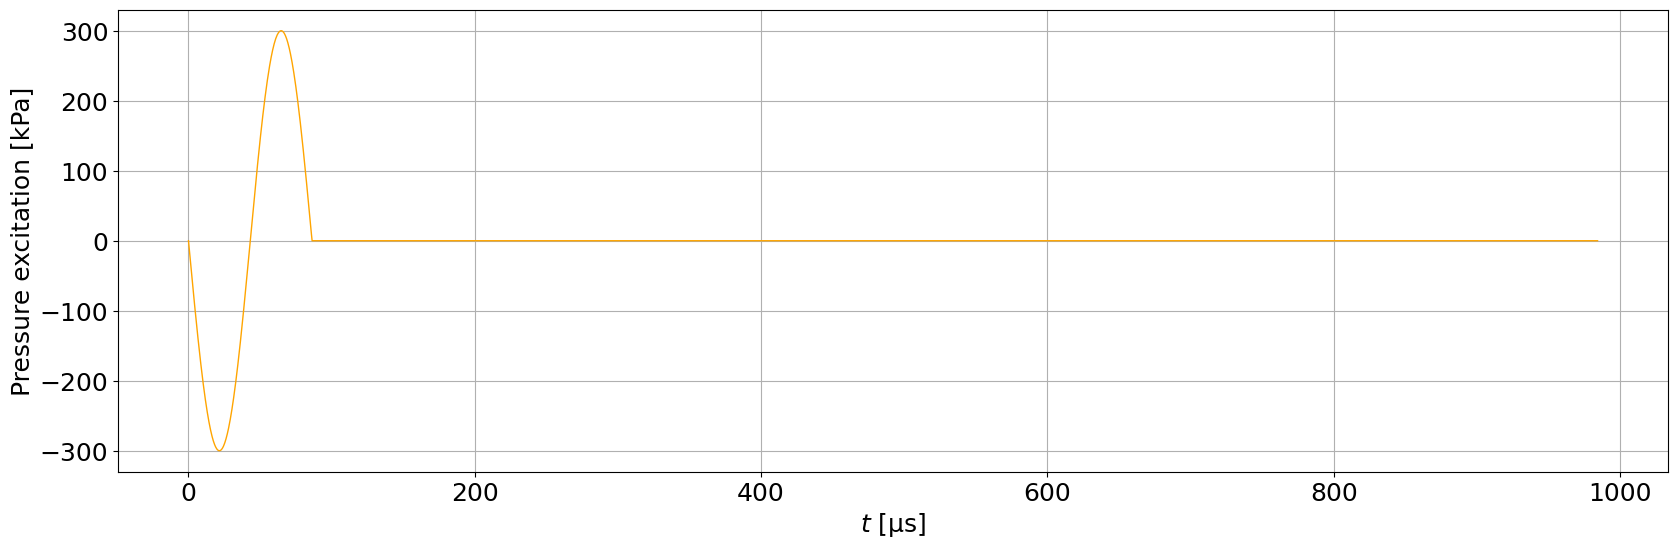

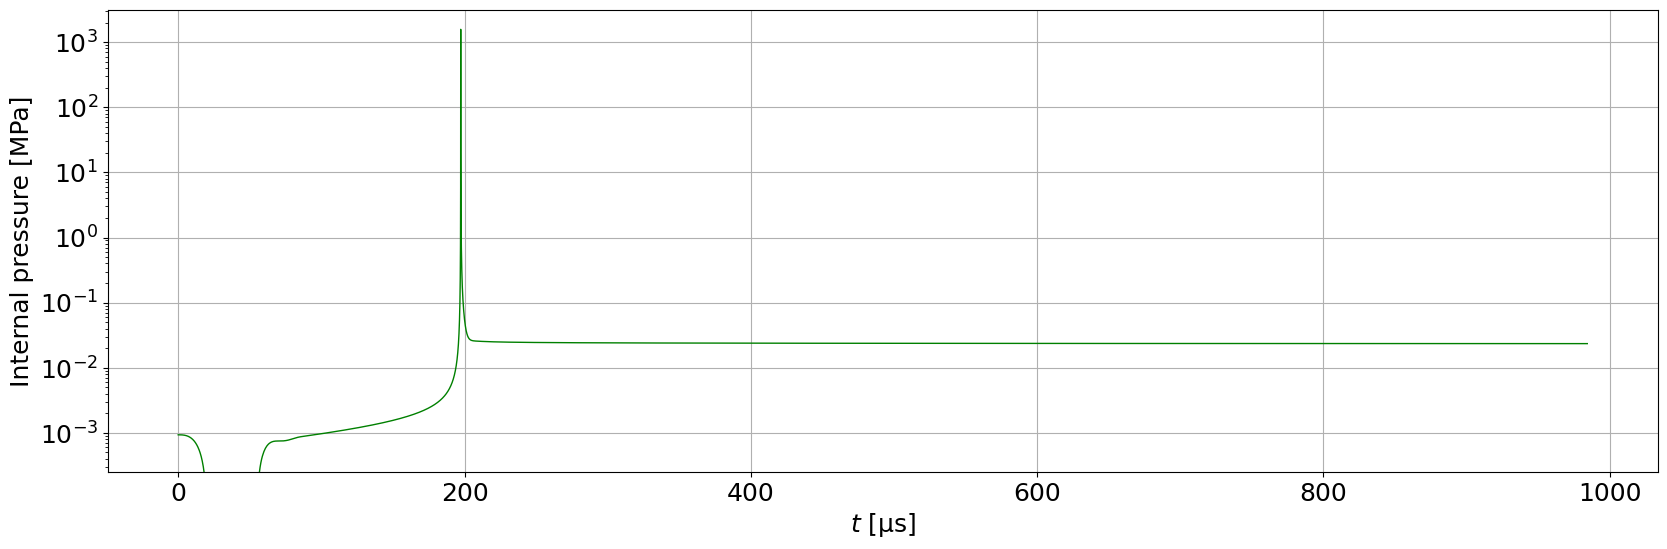

Control parameters:
    ID = 1452,                                   # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00033651,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['N2'], par.index['H2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.25, 0.75],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  506.62,                             # ambient pressure [Pa]
    T_inf =  303.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  4245.13,                              # vapour pressure [Pa]
    mu_L =  0.00081486,                          # dynamic viscosity [Pa*

In [9]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar, plot_pressure=True, show_legend=True, base_name='sin', format='svg')

succecfully solved with LSODA solver


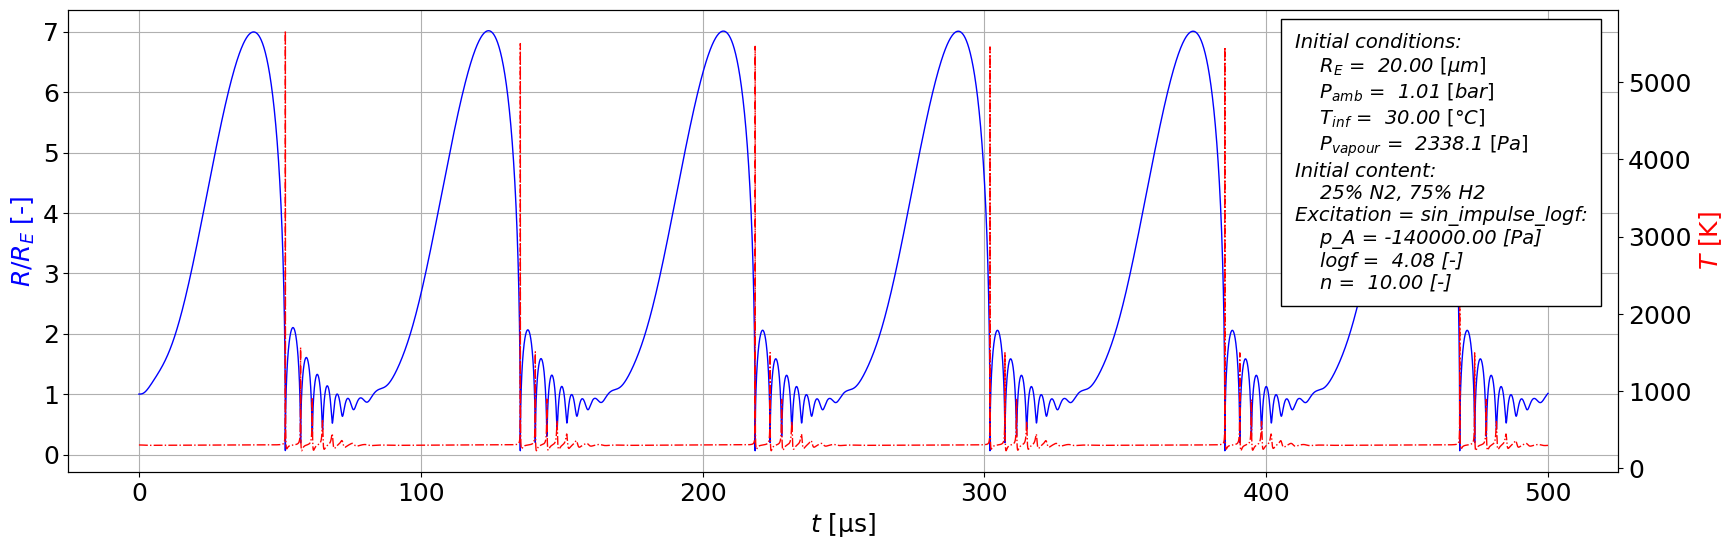

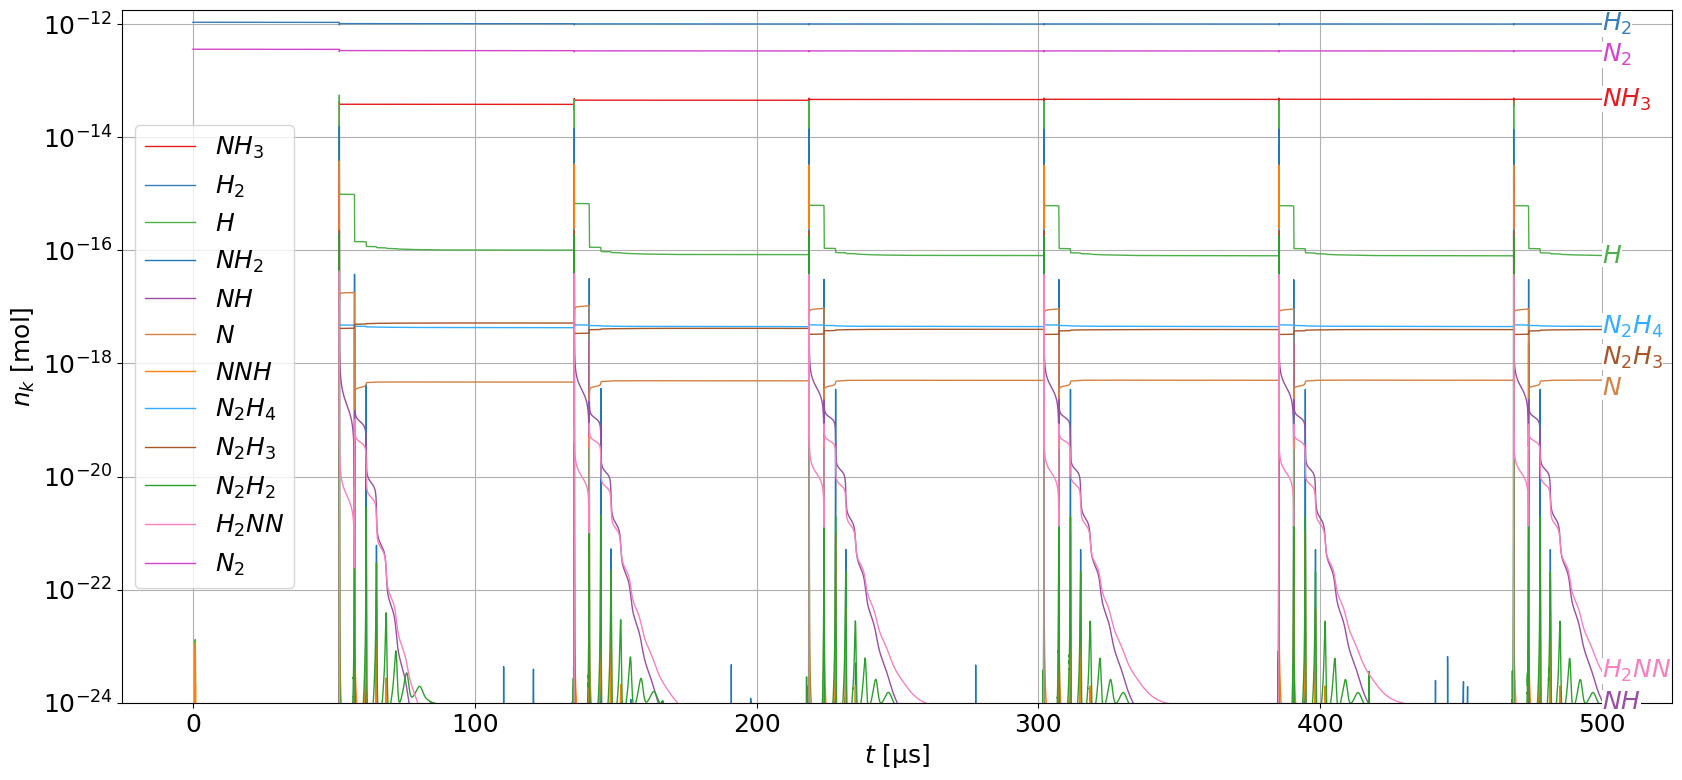

Control parameters:
    ID = 2504,                                   # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00002000,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['N2'], par.index['H2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.25, 0.75],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  303.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.10,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [182]:
cpar.n=10
cpar.R_E=20e-6
cpar.p_A=-1.4e5
cpar.logf = np.log10(12000)
de.plot(cpar, plot_pressure=False, show_legend=True, t_int=[0.0, 6.0/10**cpar['logf']], base_name='sin_continous', format='svg')